# World Happiness Report Project
Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns

from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")

In [4]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df5=df.rename(columns = {'Happiness.Rank':'Happ.Rank', 'Happiness.Score':'Happ.Score', 'Economy..GDP.per.Capita.':'GDP', 
                     'Health..Life.Expectancy.':'Life.Expect','Trust..Government.Corruption.':'Trust.to.Gov', 'Dystopia.Residual':'Dystop.Res'})
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

# Visualization

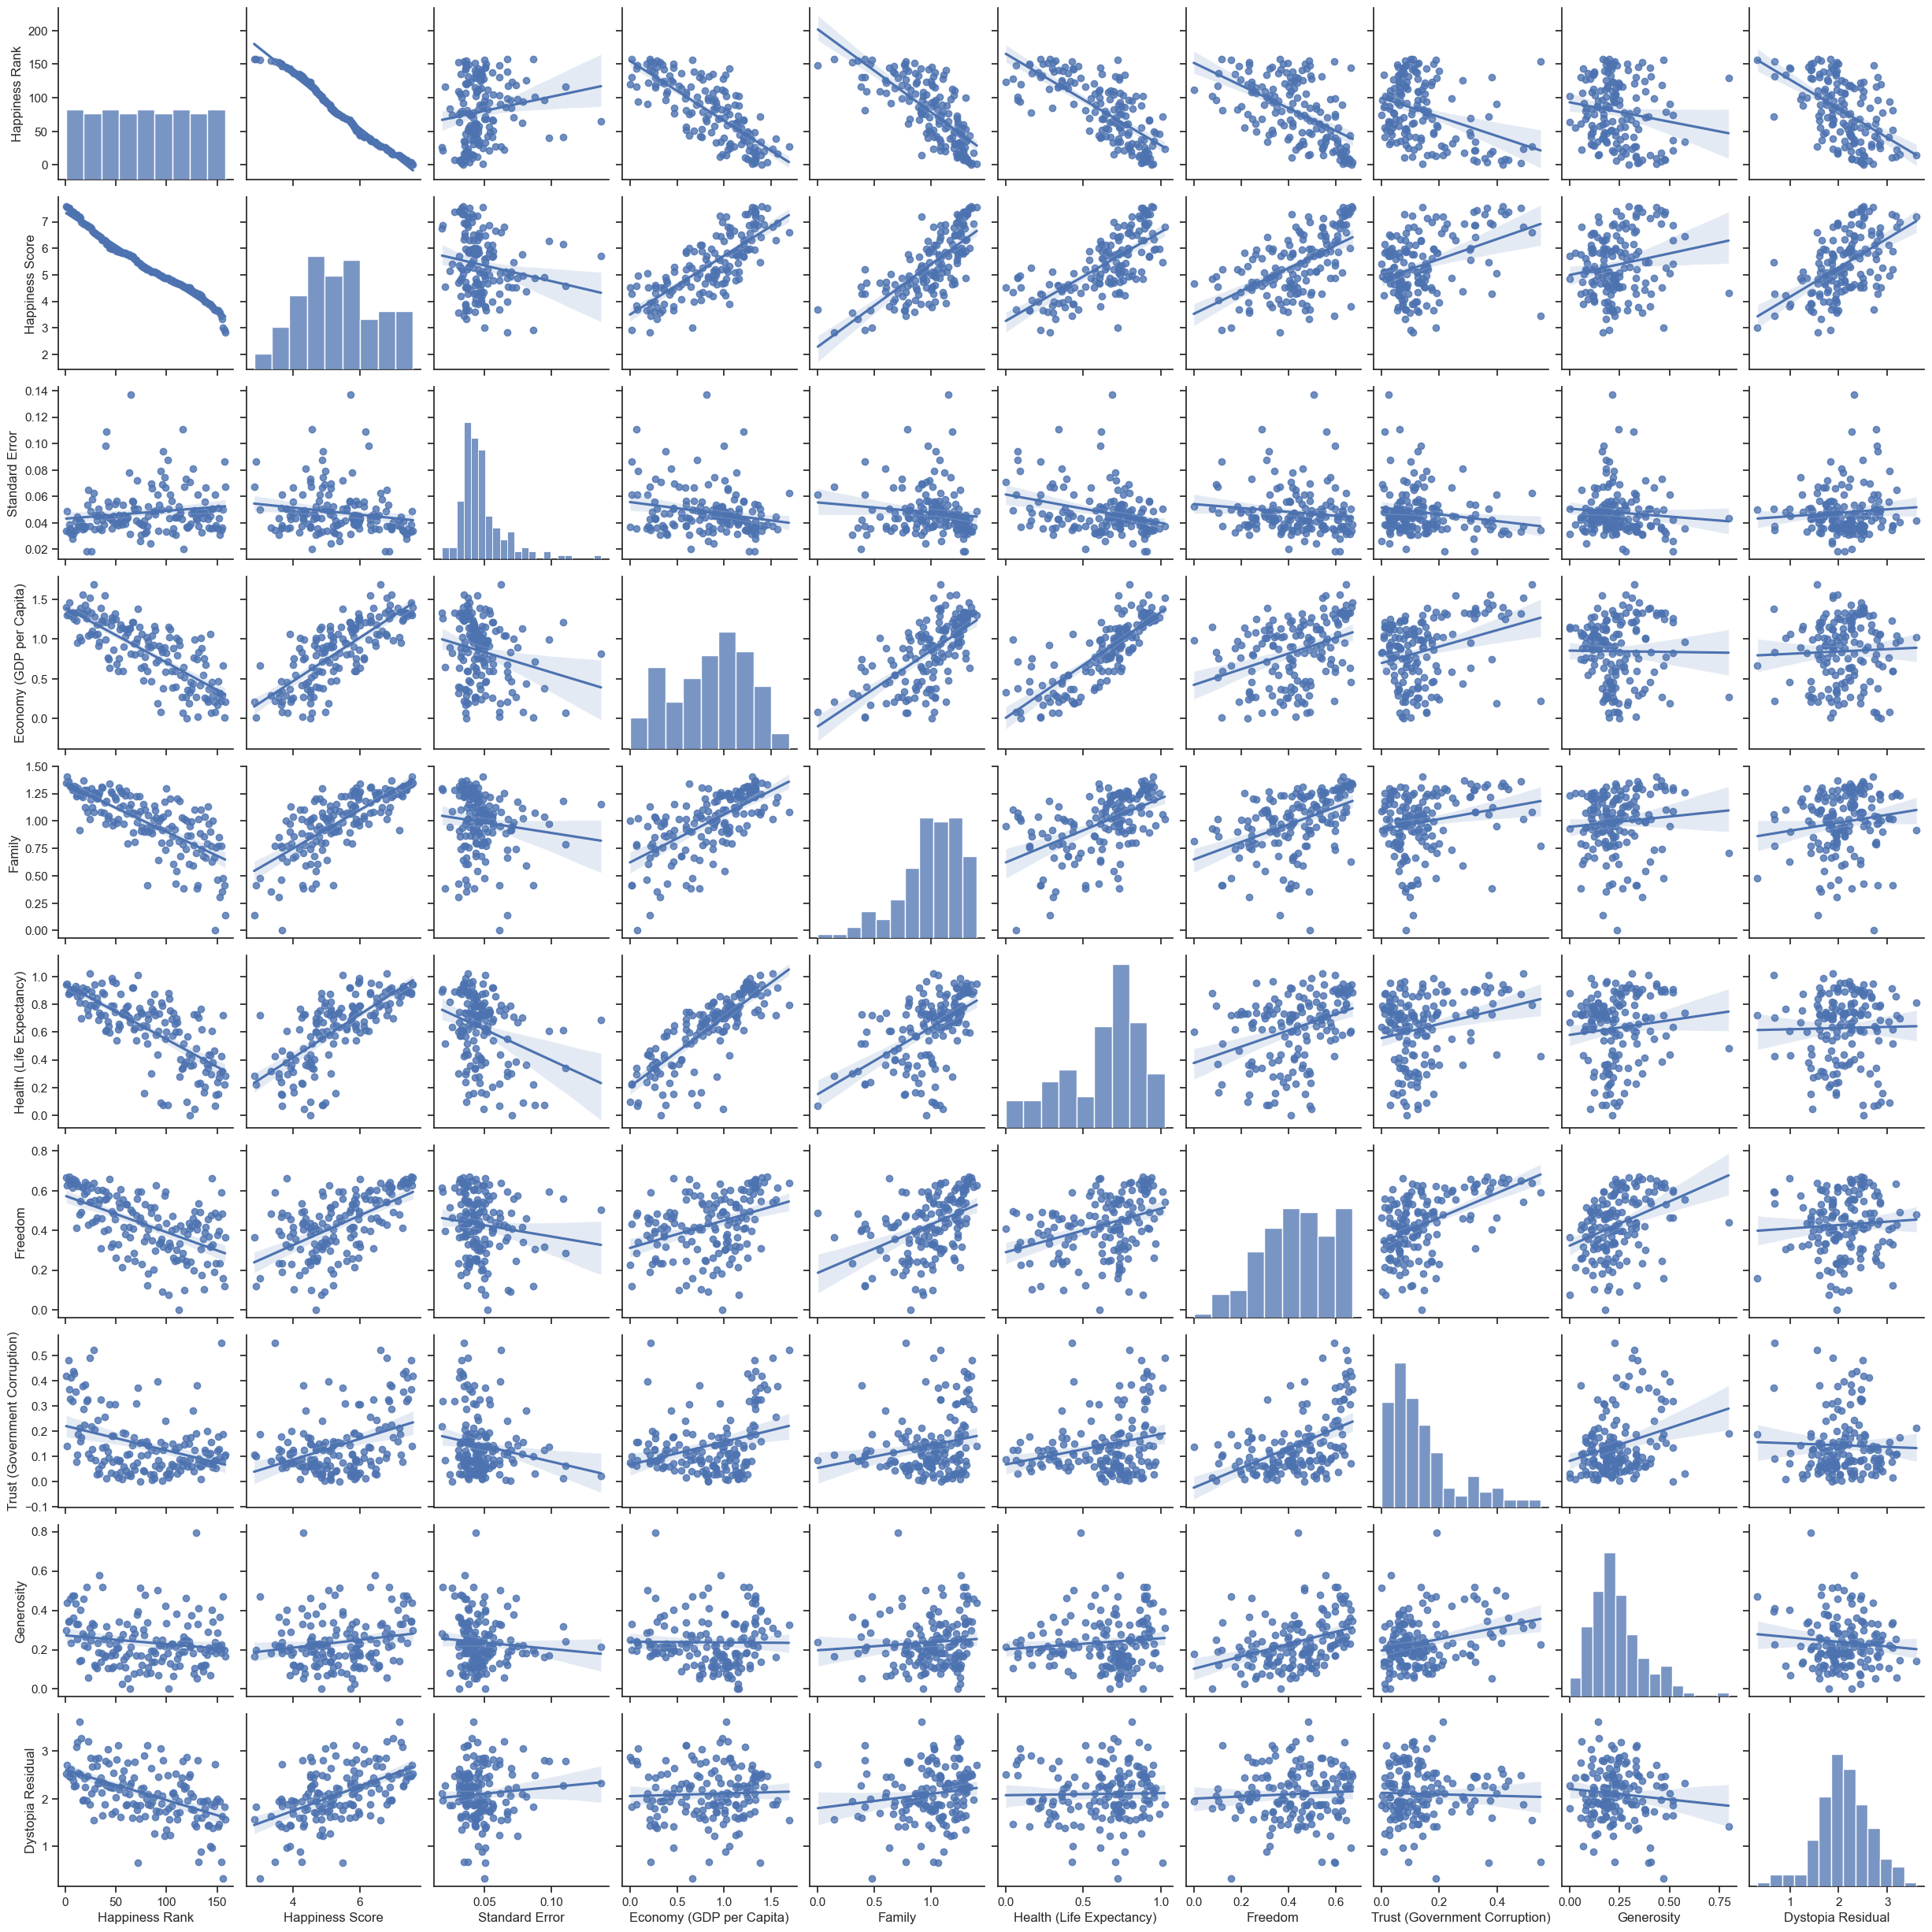

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg")

Scatterplots show possible associations or relationships between two variables. I wanted to see each variable positive and negative relationships, uphill lines are showing positive, downhill lines are negative relationships. In above plots are showing that we have weaker, stronger relationships. To quantify the strength of a linear (straight) relationship, we will use a correlation analysis.

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\1873879989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

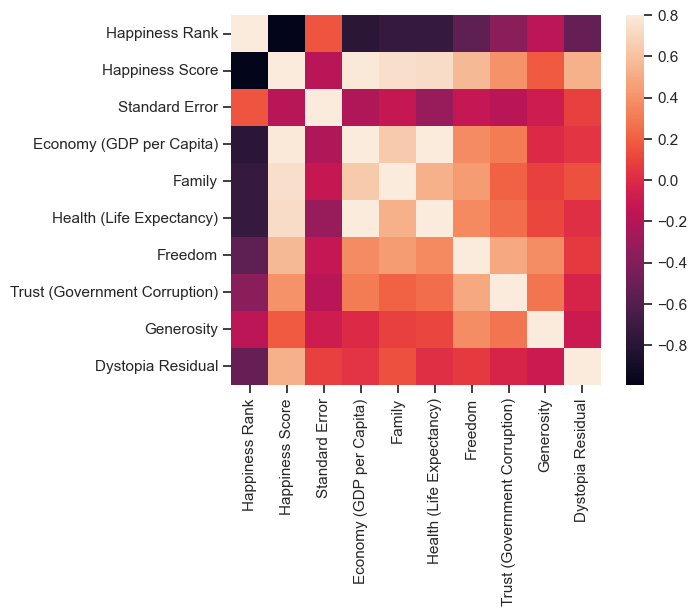

In [12]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Above 2 graphs are showing us how is the correlation between each variable, we will concentrate the highly correlated variables. Happiness Rank and Happiness Score have negative correlation, while Happiness Score is increasing, Ranking is going to decrease (1 is the top, 155 is the last ranking). Therefore, we will analyze Happiness Score relations with GDP, Life Expectations, Freedom and Trust to Government Corruption as these values are highly correlated to each other. GDP is the main factor which is effecting others as Family, Life Expectations and Freedom.

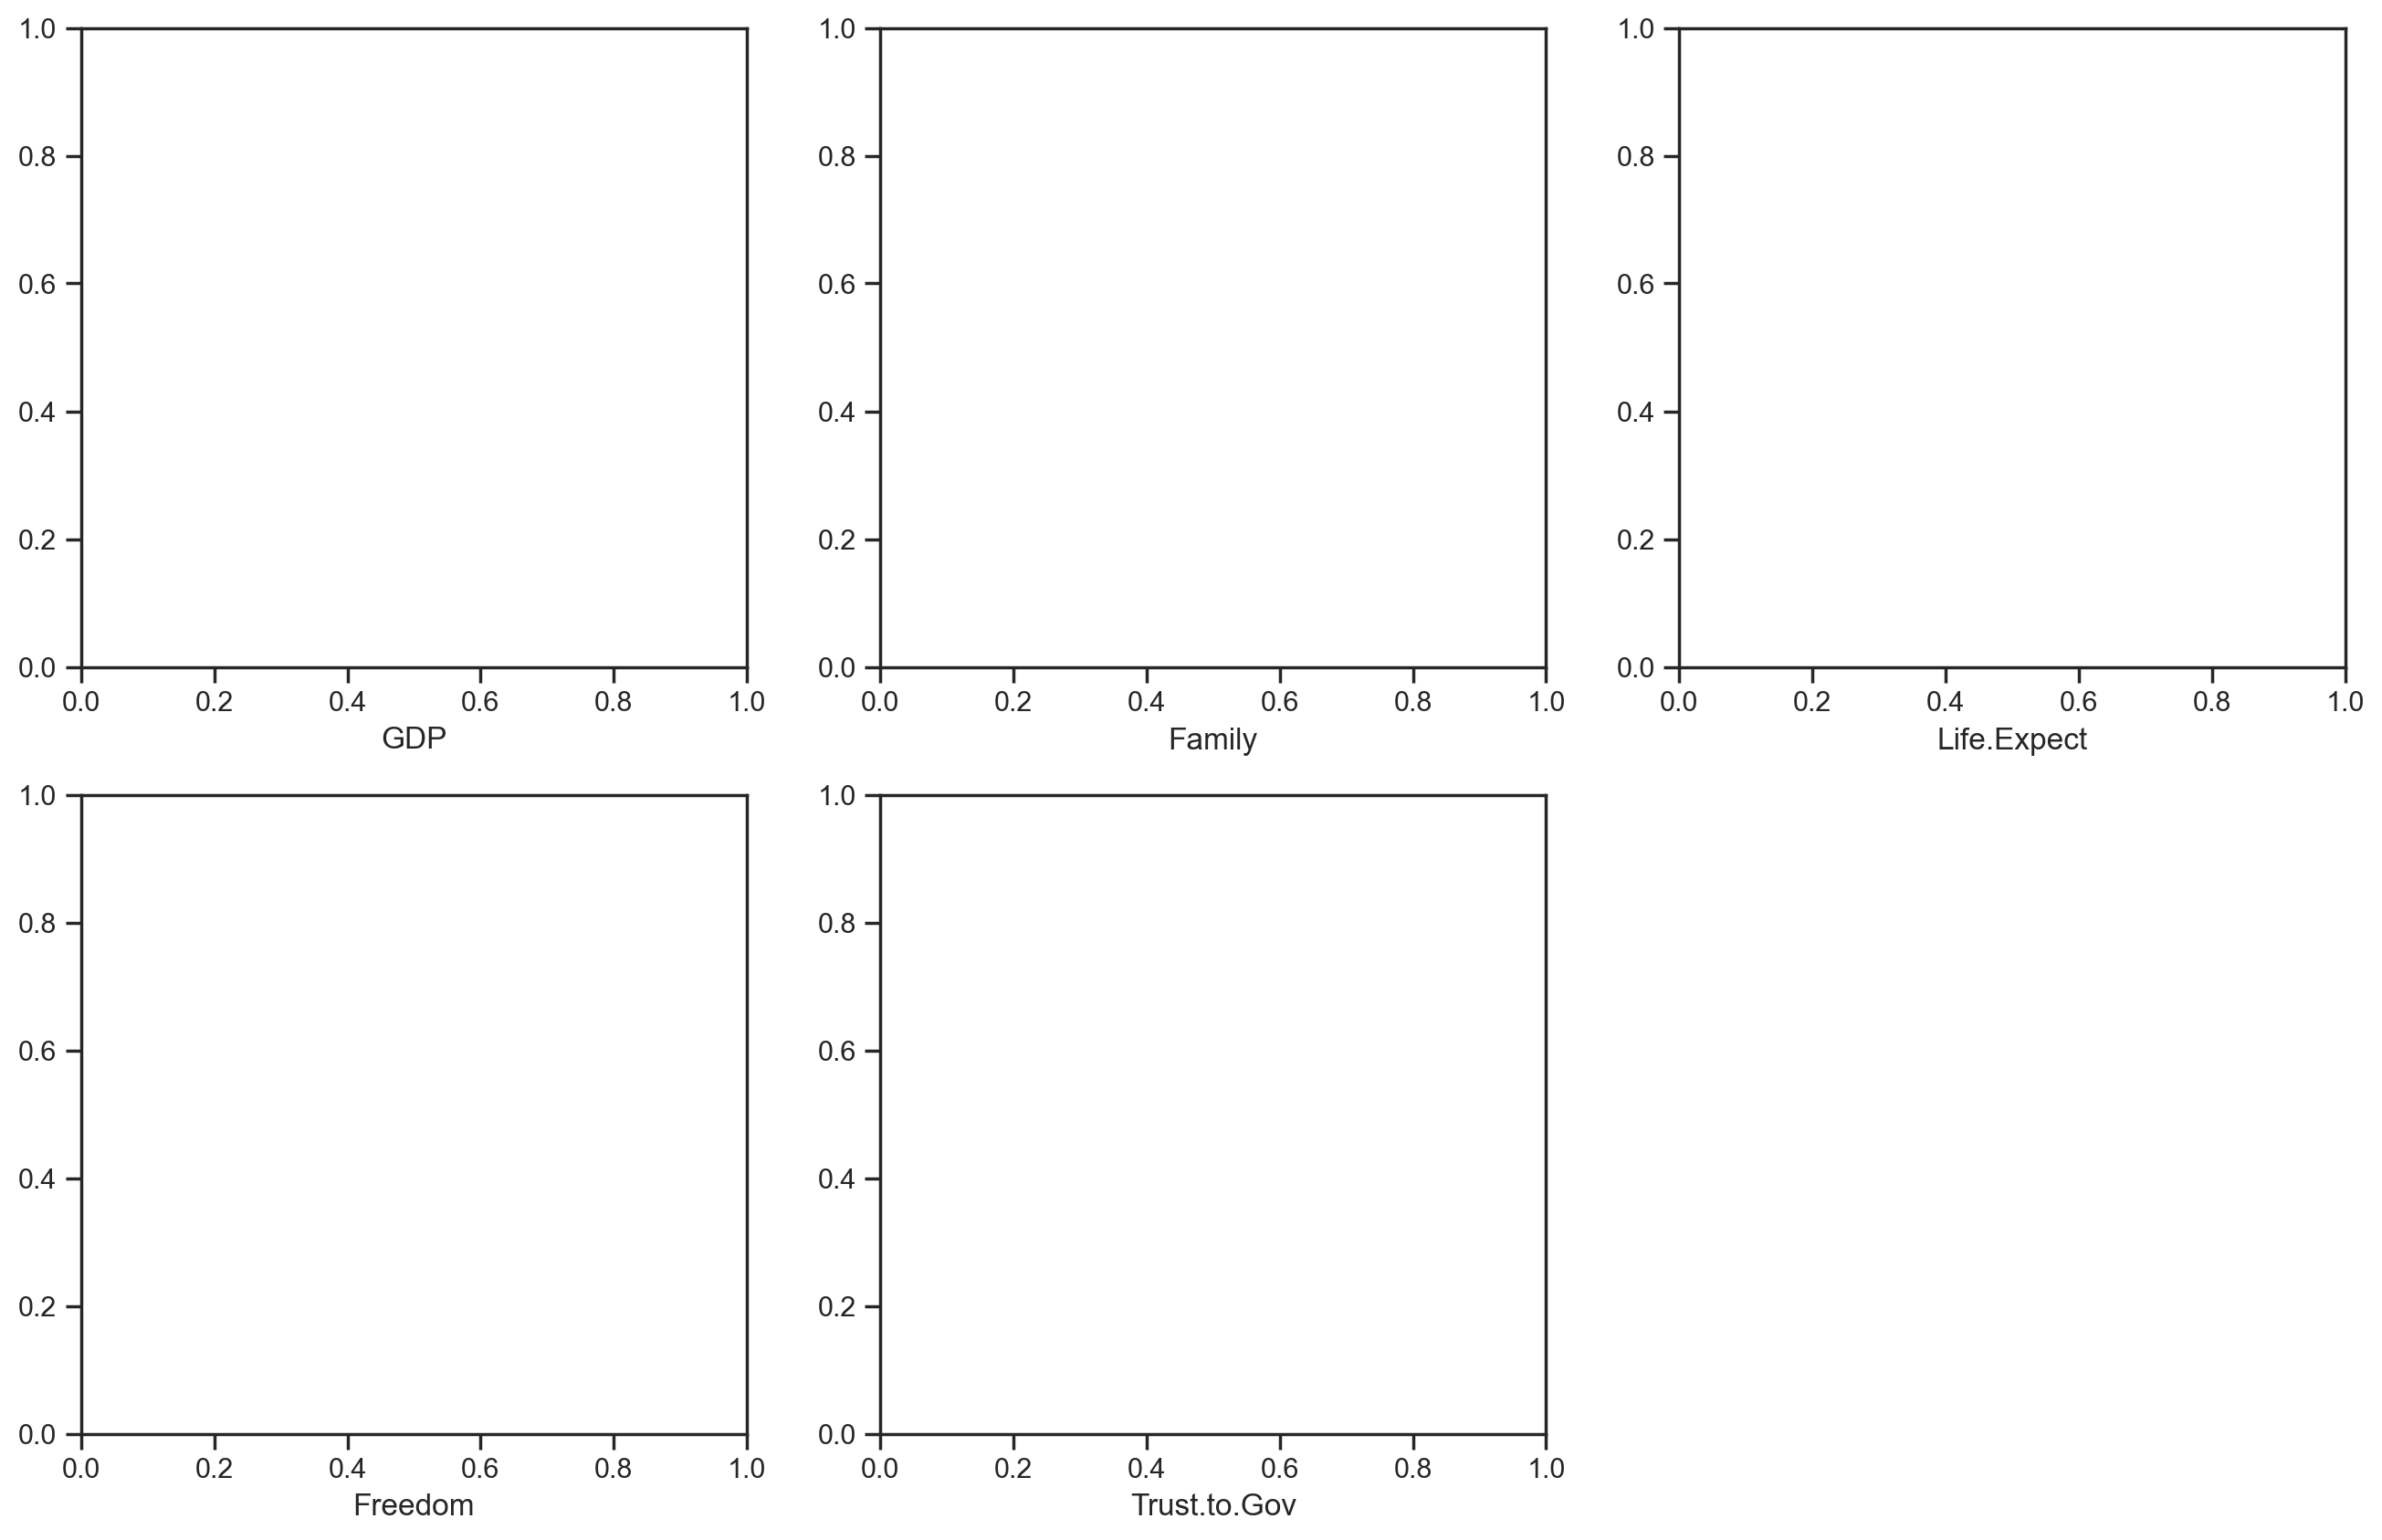

In [24]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
for i, key in enumerate(['GDP', 'Family', 'Life.Expect', 'Freedom', 'Trust.to.Gov']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
plt.show()

In [25]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #loading necessary libraries for mapping
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', #As we have only country names in data, we can use country names to see the happiness
           locations = df5['Country'],
           locationmode = 'country names', 
           text = df5['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3) 

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['airy', 'aitoff', 'albers', 'albers usa', 'august',
            'azimuthal equal area', 'azimuthal equidistant', 'baker',
            'bertin1953', 'boggs', 'bonne', 'bottomley', 'bromley',
            'collignon', 'conic conformal', 'conic equal area', 'conic
            equidistant', 'craig', 'craster', 'cylindrical equal
            area', 'cylindrical stereographic', 'eckert1', 'eckert2',
            'eckert3', 'eckert4', 'eckert5', 'eckert6', 'eisenlohr',
            'equirectangular', 'fahey', 'foucaut', 'foucaut
            sinusoidal', 'ginzburg4', 'ginzburg5', 'ginzburg6',
            'ginzburg8', 'ginzburg9', 'gnomonic', 'gringorten',
            'gringorten quincuncial', 'guyou', 'hammer', 'hill',
            'homolosine', 'hufnagel', 'hyperelliptical',
            'kavrayskiy7', 'lagrange', 'larrivee', 'laskowski',
            'loximuthal', 'mercator', 'miller', 'mollweide', 'mt flat
            polar parabolic', 'mt flat polar quartic', 'mt flat polar
            sinusoidal', 'natural earth', 'natural earth1', 'natural
            earth2', 'nell hammer', 'nicolosi', 'orthographic',
            'patterson', 'peirce quincuncial', 'polyconic',
            'rectangular polyconic', 'robinson', 'satellite', 'sinu
            mollweide', 'sinusoidal', 'stereographic', 'times',
            'transverse mercator', 'van der grinten', 'van der
            grinten2', 'van der grinten3', 'van der grinten4',
            'wagner4', 'wagner6', 'wiechel', 'winkel tripel',
            'winkel3']

In [18]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = df5['Country'],
           locationmode = 'country names',
           z = df5['Happiness Score'], 
           text = df5['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['airy', 'aitoff', 'albers', 'albers usa', 'august',
            'azimuthal equal area', 'azimuthal equidistant', 'baker',
            'bertin1953', 'boggs', 'bonne', 'bottomley', 'bromley',
            'collignon', 'conic conformal', 'conic equal area', 'conic
            equidistant', 'craig', 'craster', 'cylindrical equal
            area', 'cylindrical stereographic', 'eckert1', 'eckert2',
            'eckert3', 'eckert4', 'eckert5', 'eckert6', 'eisenlohr',
            'equirectangular', 'fahey', 'foucaut', 'foucaut
            sinusoidal', 'ginzburg4', 'ginzburg5', 'ginzburg6',
            'ginzburg8', 'ginzburg9', 'gnomonic', 'gringorten',
            'gringorten quincuncial', 'guyou', 'hammer', 'hill',
            'homolosine', 'hufnagel', 'hyperelliptical',
            'kavrayskiy7', 'lagrange', 'larrivee', 'laskowski',
            'loximuthal', 'mercator', 'miller', 'mollweide', 'mt flat
            polar parabolic', 'mt flat polar quartic', 'mt flat polar
            sinusoidal', 'natural earth', 'natural earth1', 'natural
            earth2', 'nell hammer', 'nicolosi', 'orthographic',
            'patterson', 'peirce quincuncial', 'polyconic',
            'rectangular polyconic', 'robinson', 'satellite', 'sinu
            mollweide', 'sinusoidal', 'stereographic', 'times',
            'transverse mercator', 'van der grinten', 'van der
            grinten2', 'van der grinten3', 'van der grinten4',
            'wagner4', 'wagner6', 'wiechel', 'winkel tripel',
            'winkel3']

In [29]:
df5= df.groupby(['Country'], sort=False)['Happ.Score'].max().head(10) #I wanted to see top 10 Happy Countries
df5

KeyError: 'Column not found: Happ.Score'

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\3882518484.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



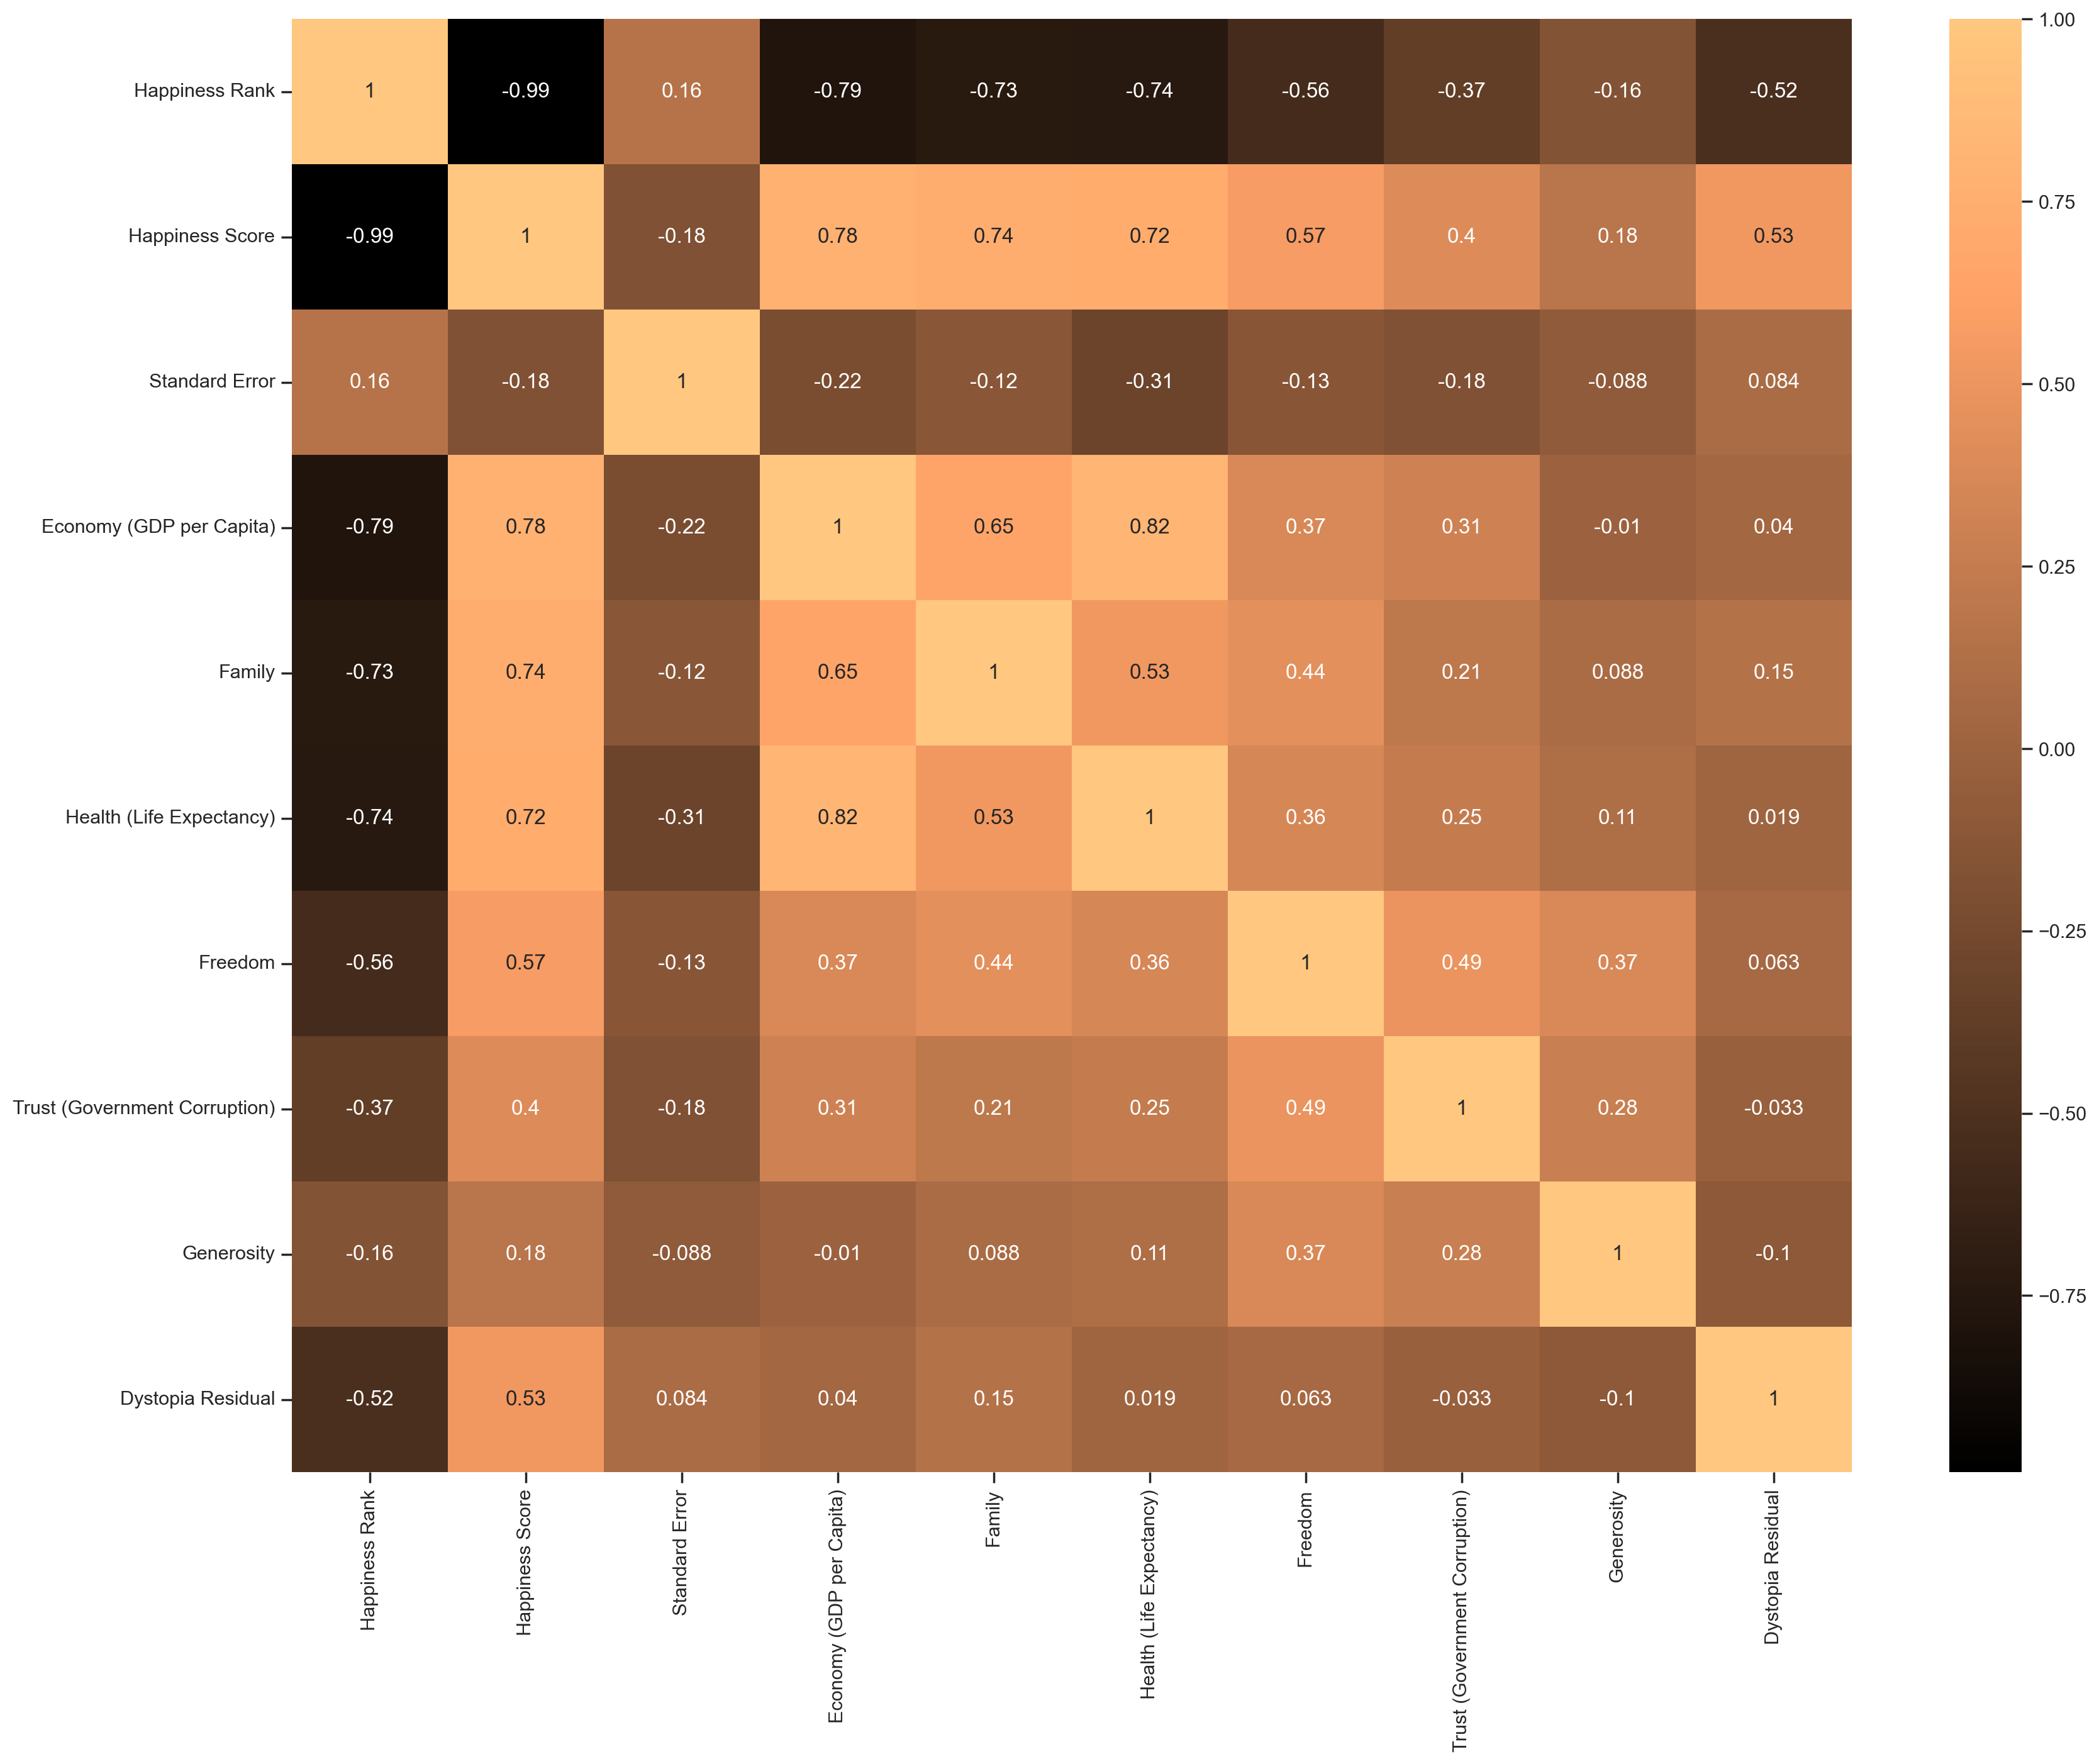

In [31]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), cmap = 'copper', annot = True)

plt.show()

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\2747928978.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



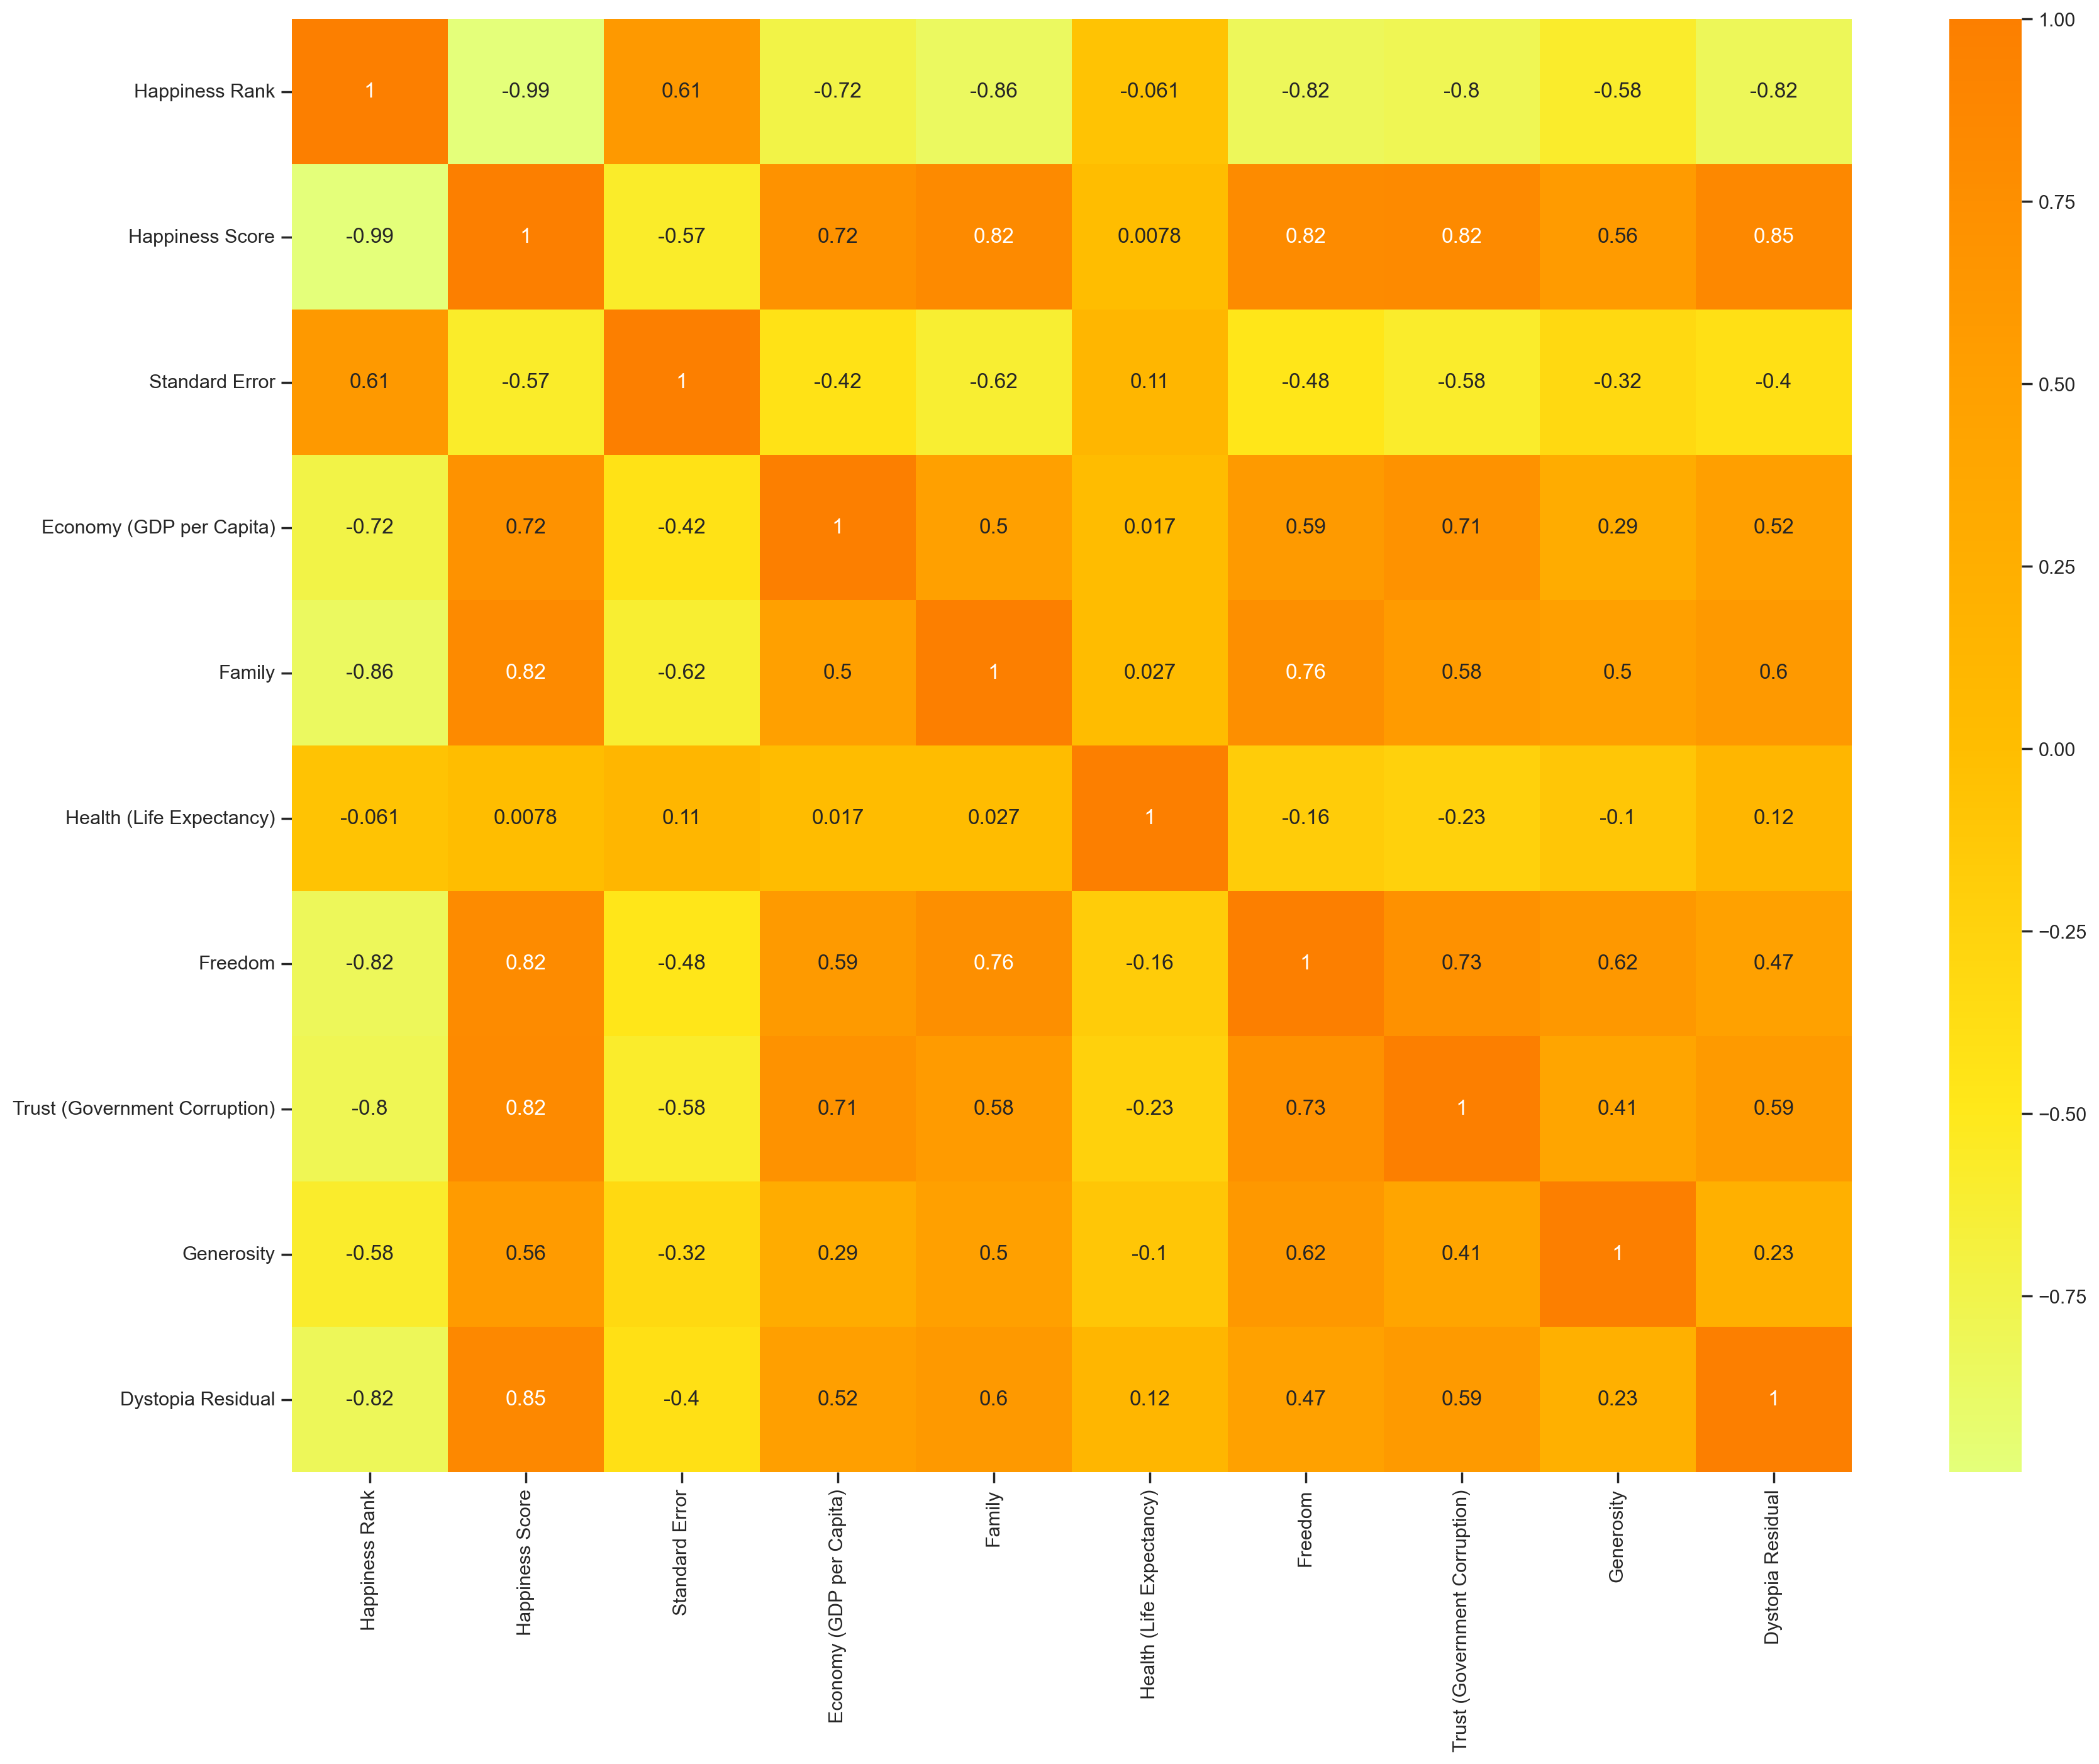

In [32]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\3240083583.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



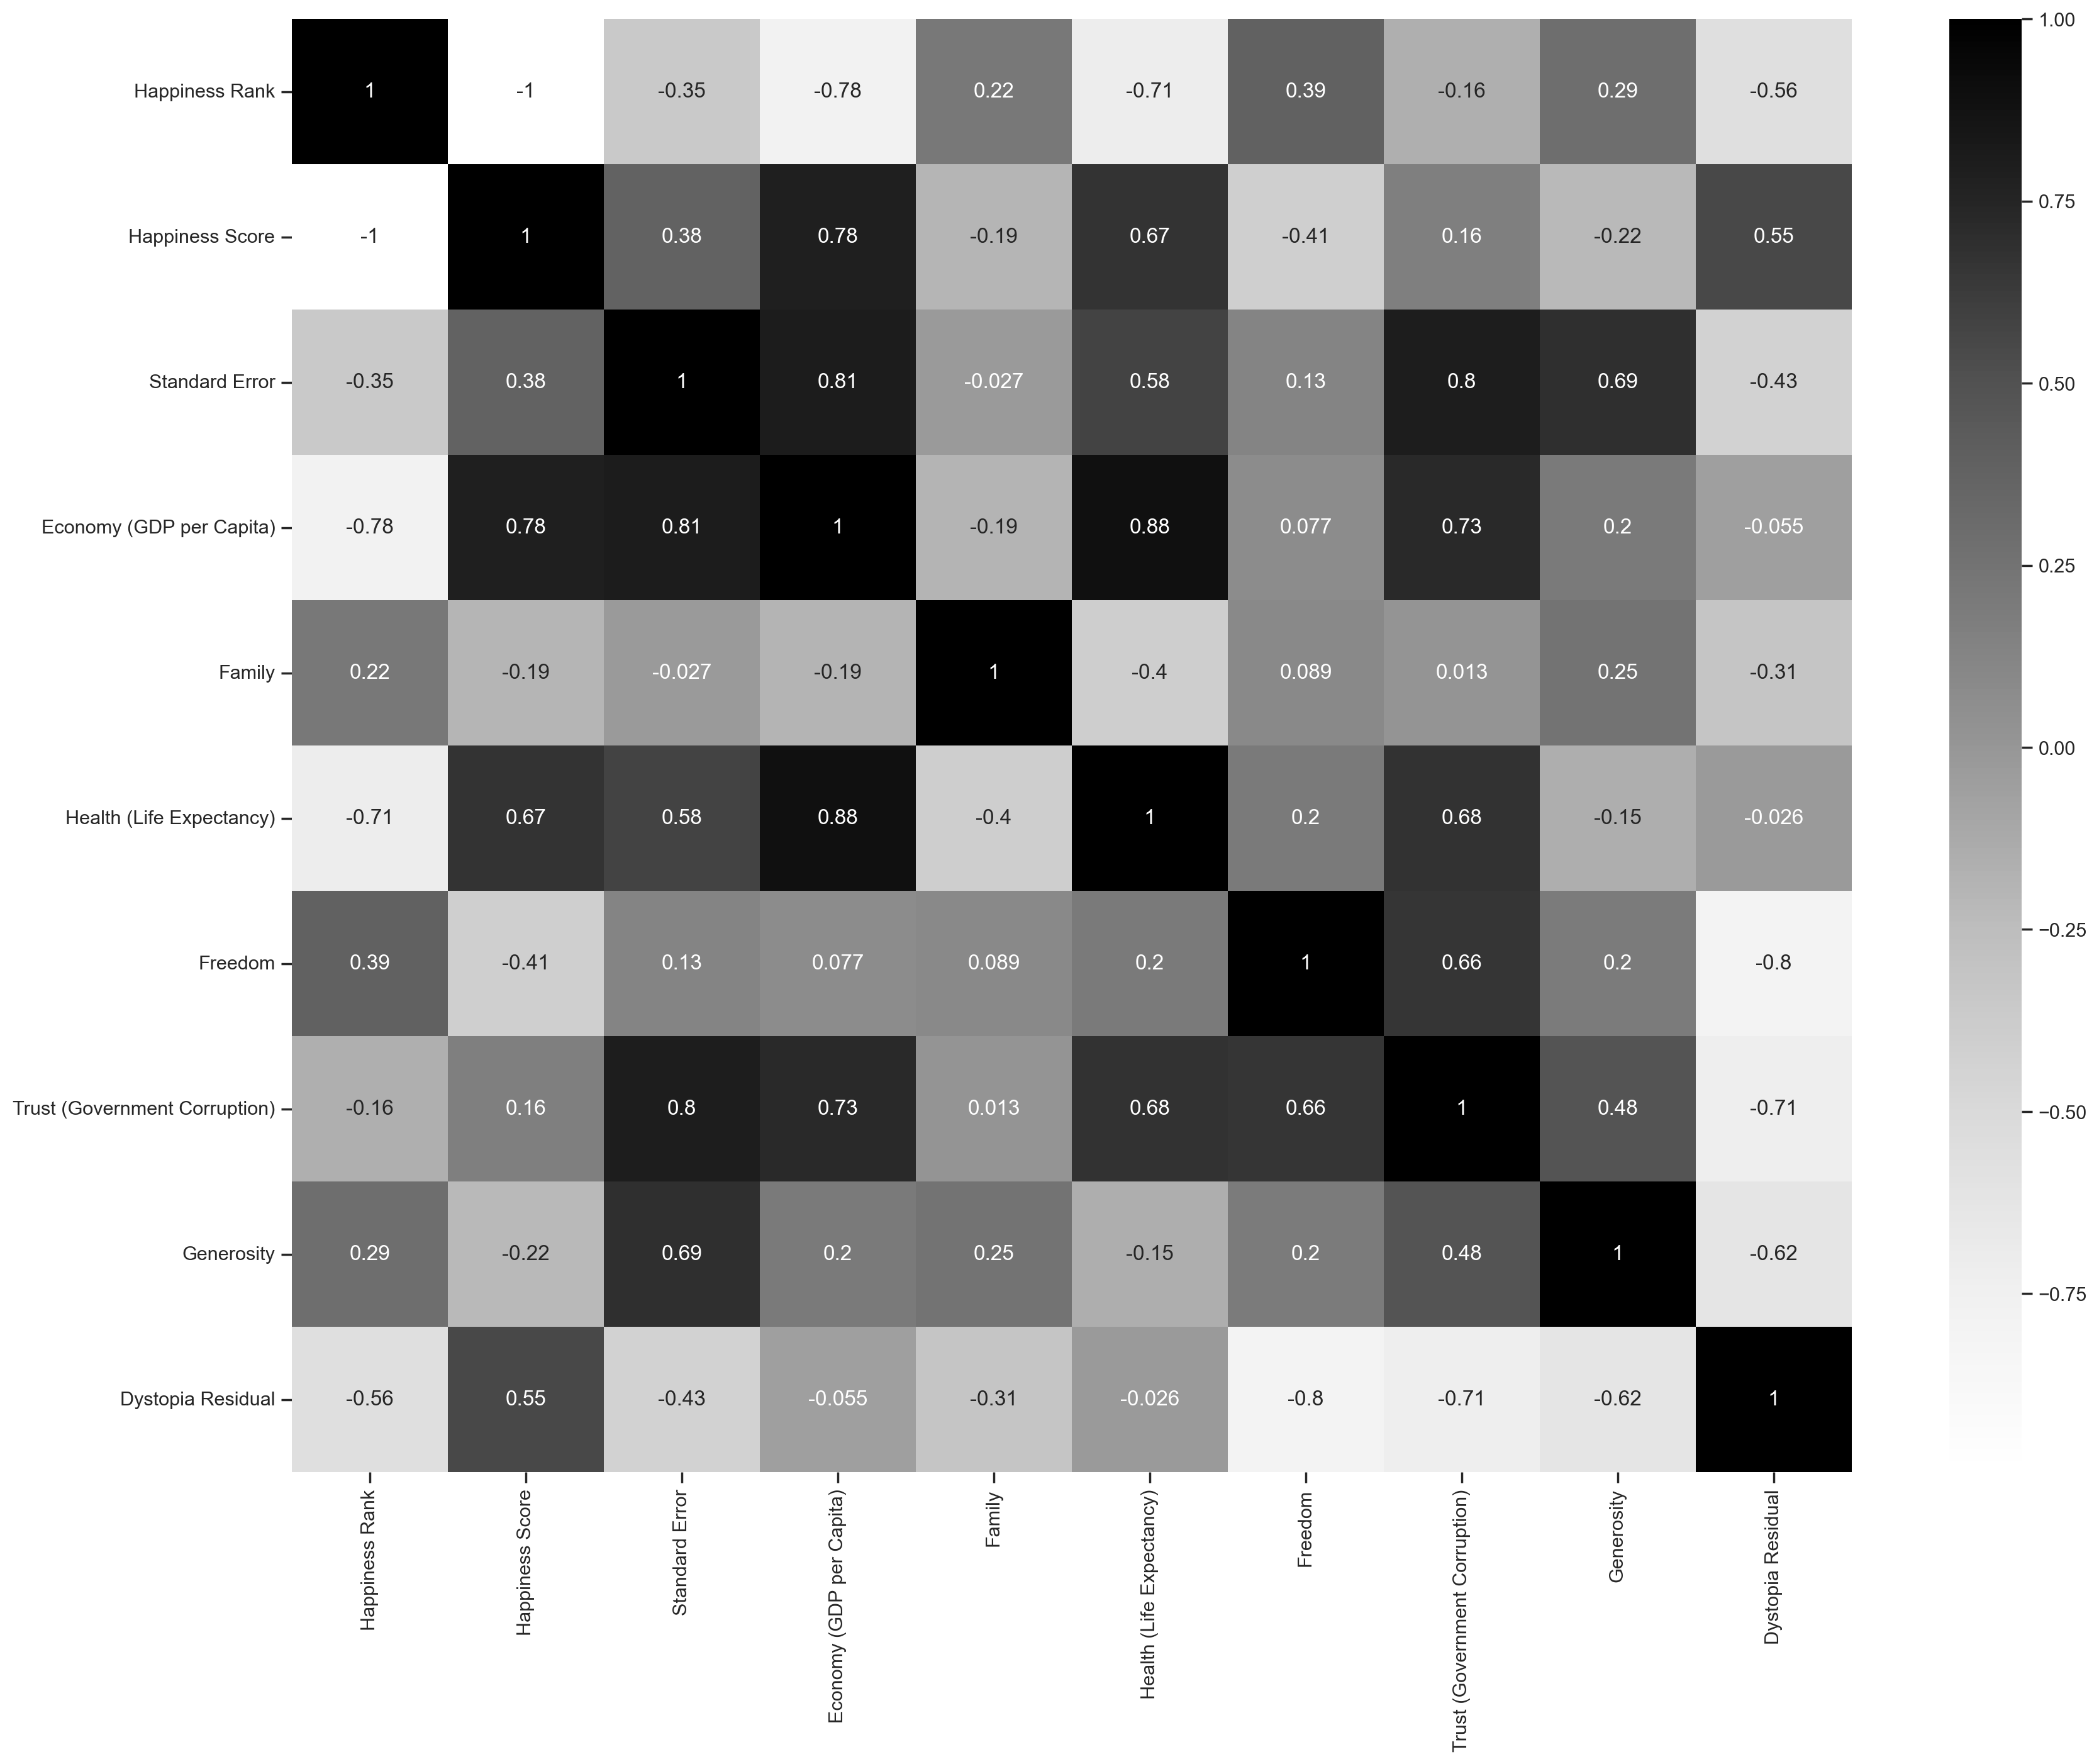

In [33]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\1779468899.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



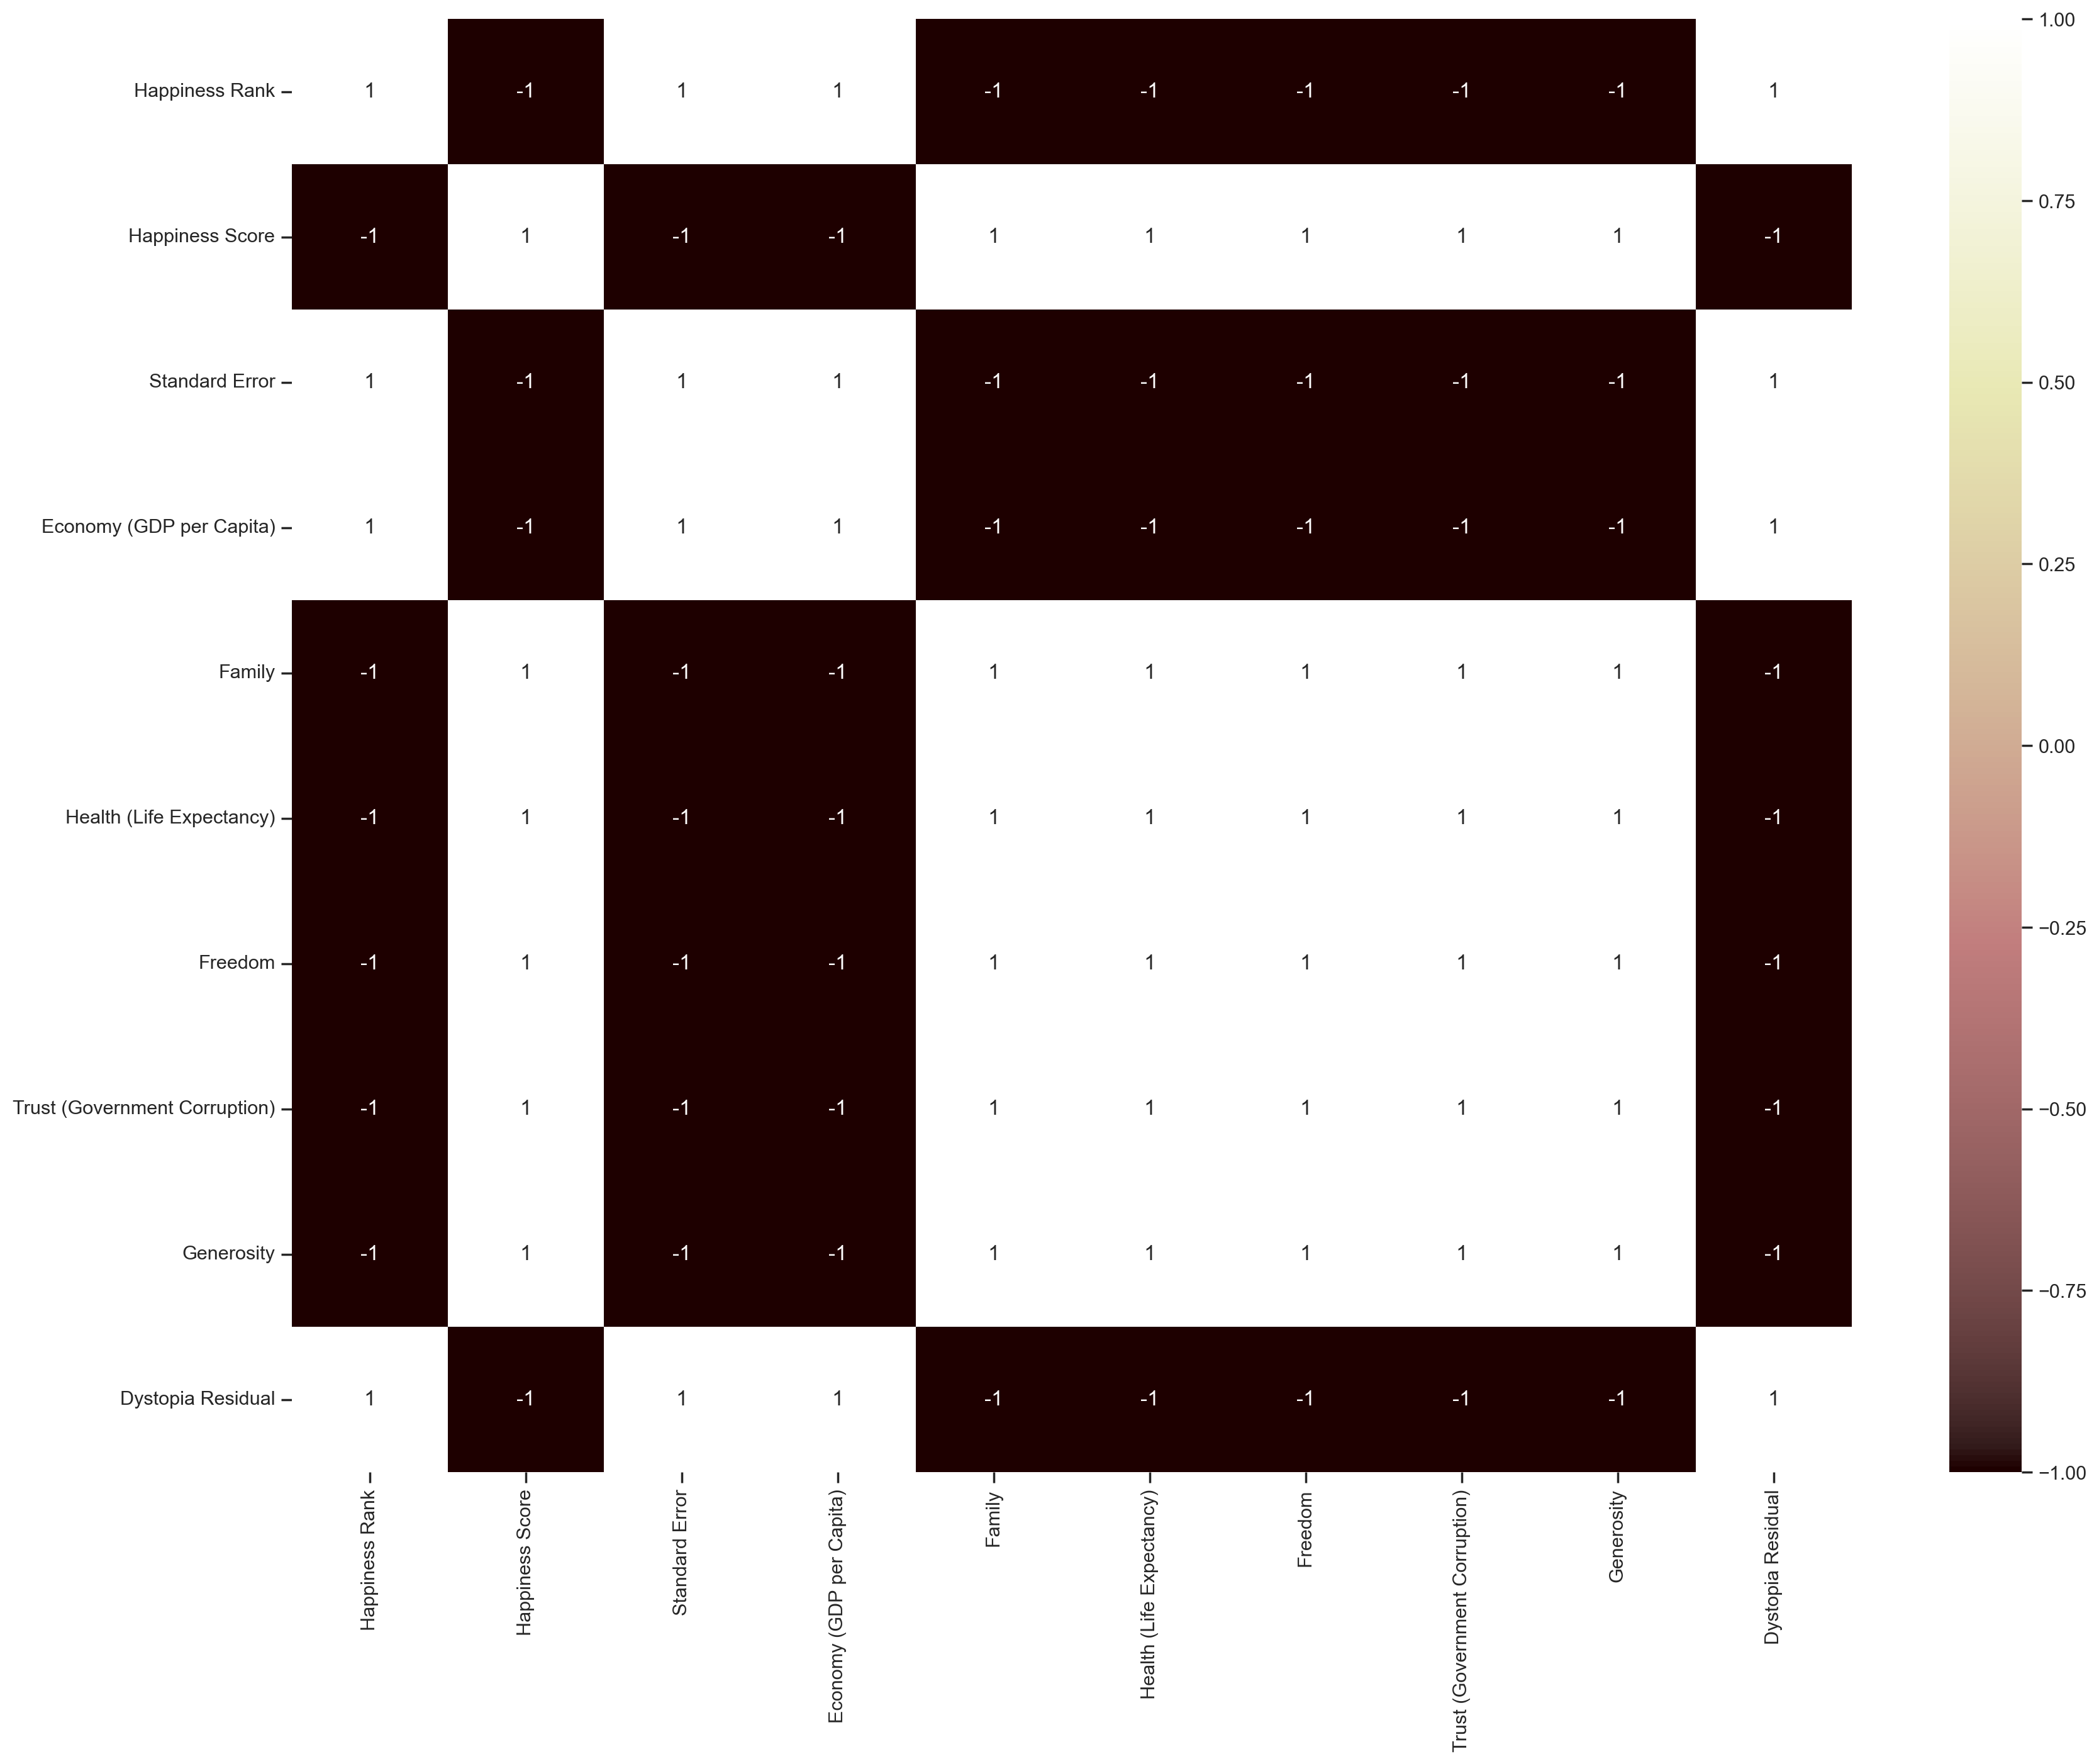

In [34]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'pink', annot = True)

plt.show()

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\120906760.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



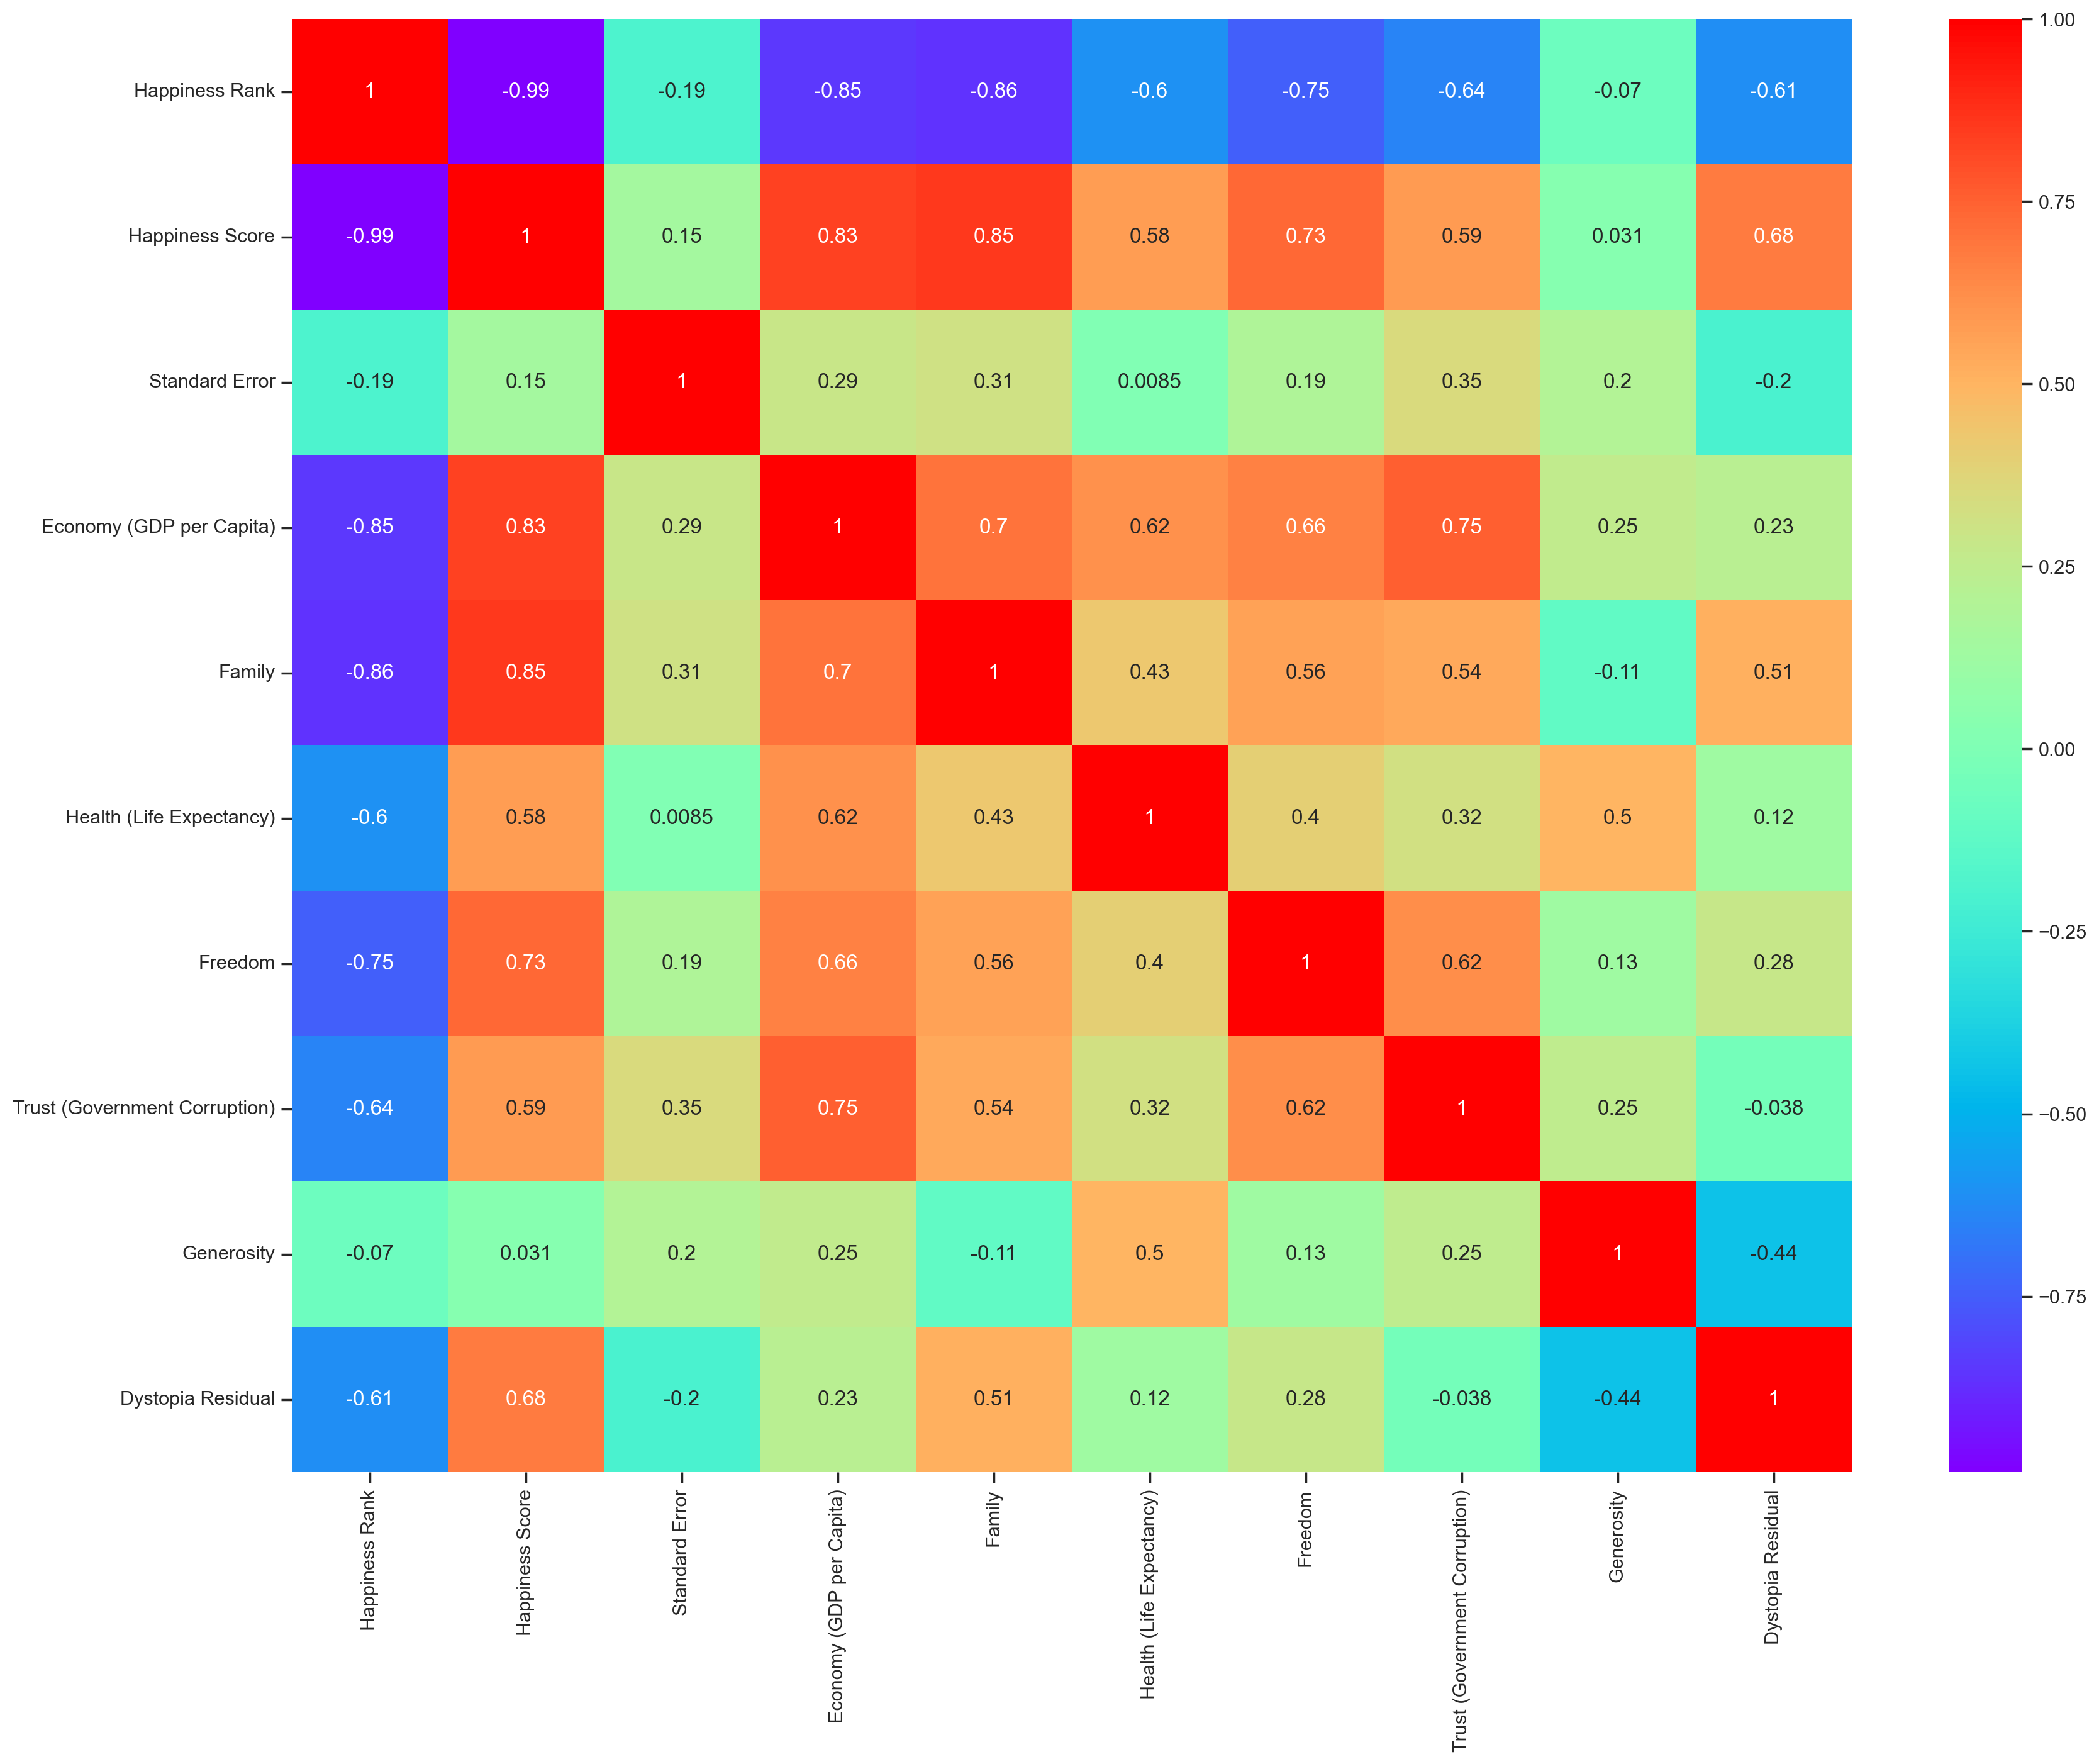

In [35]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Middle East and Northern Africa']

sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

C:\Users\h.p\AppData\Local\Temp\ipykernel_16976\1316021471.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



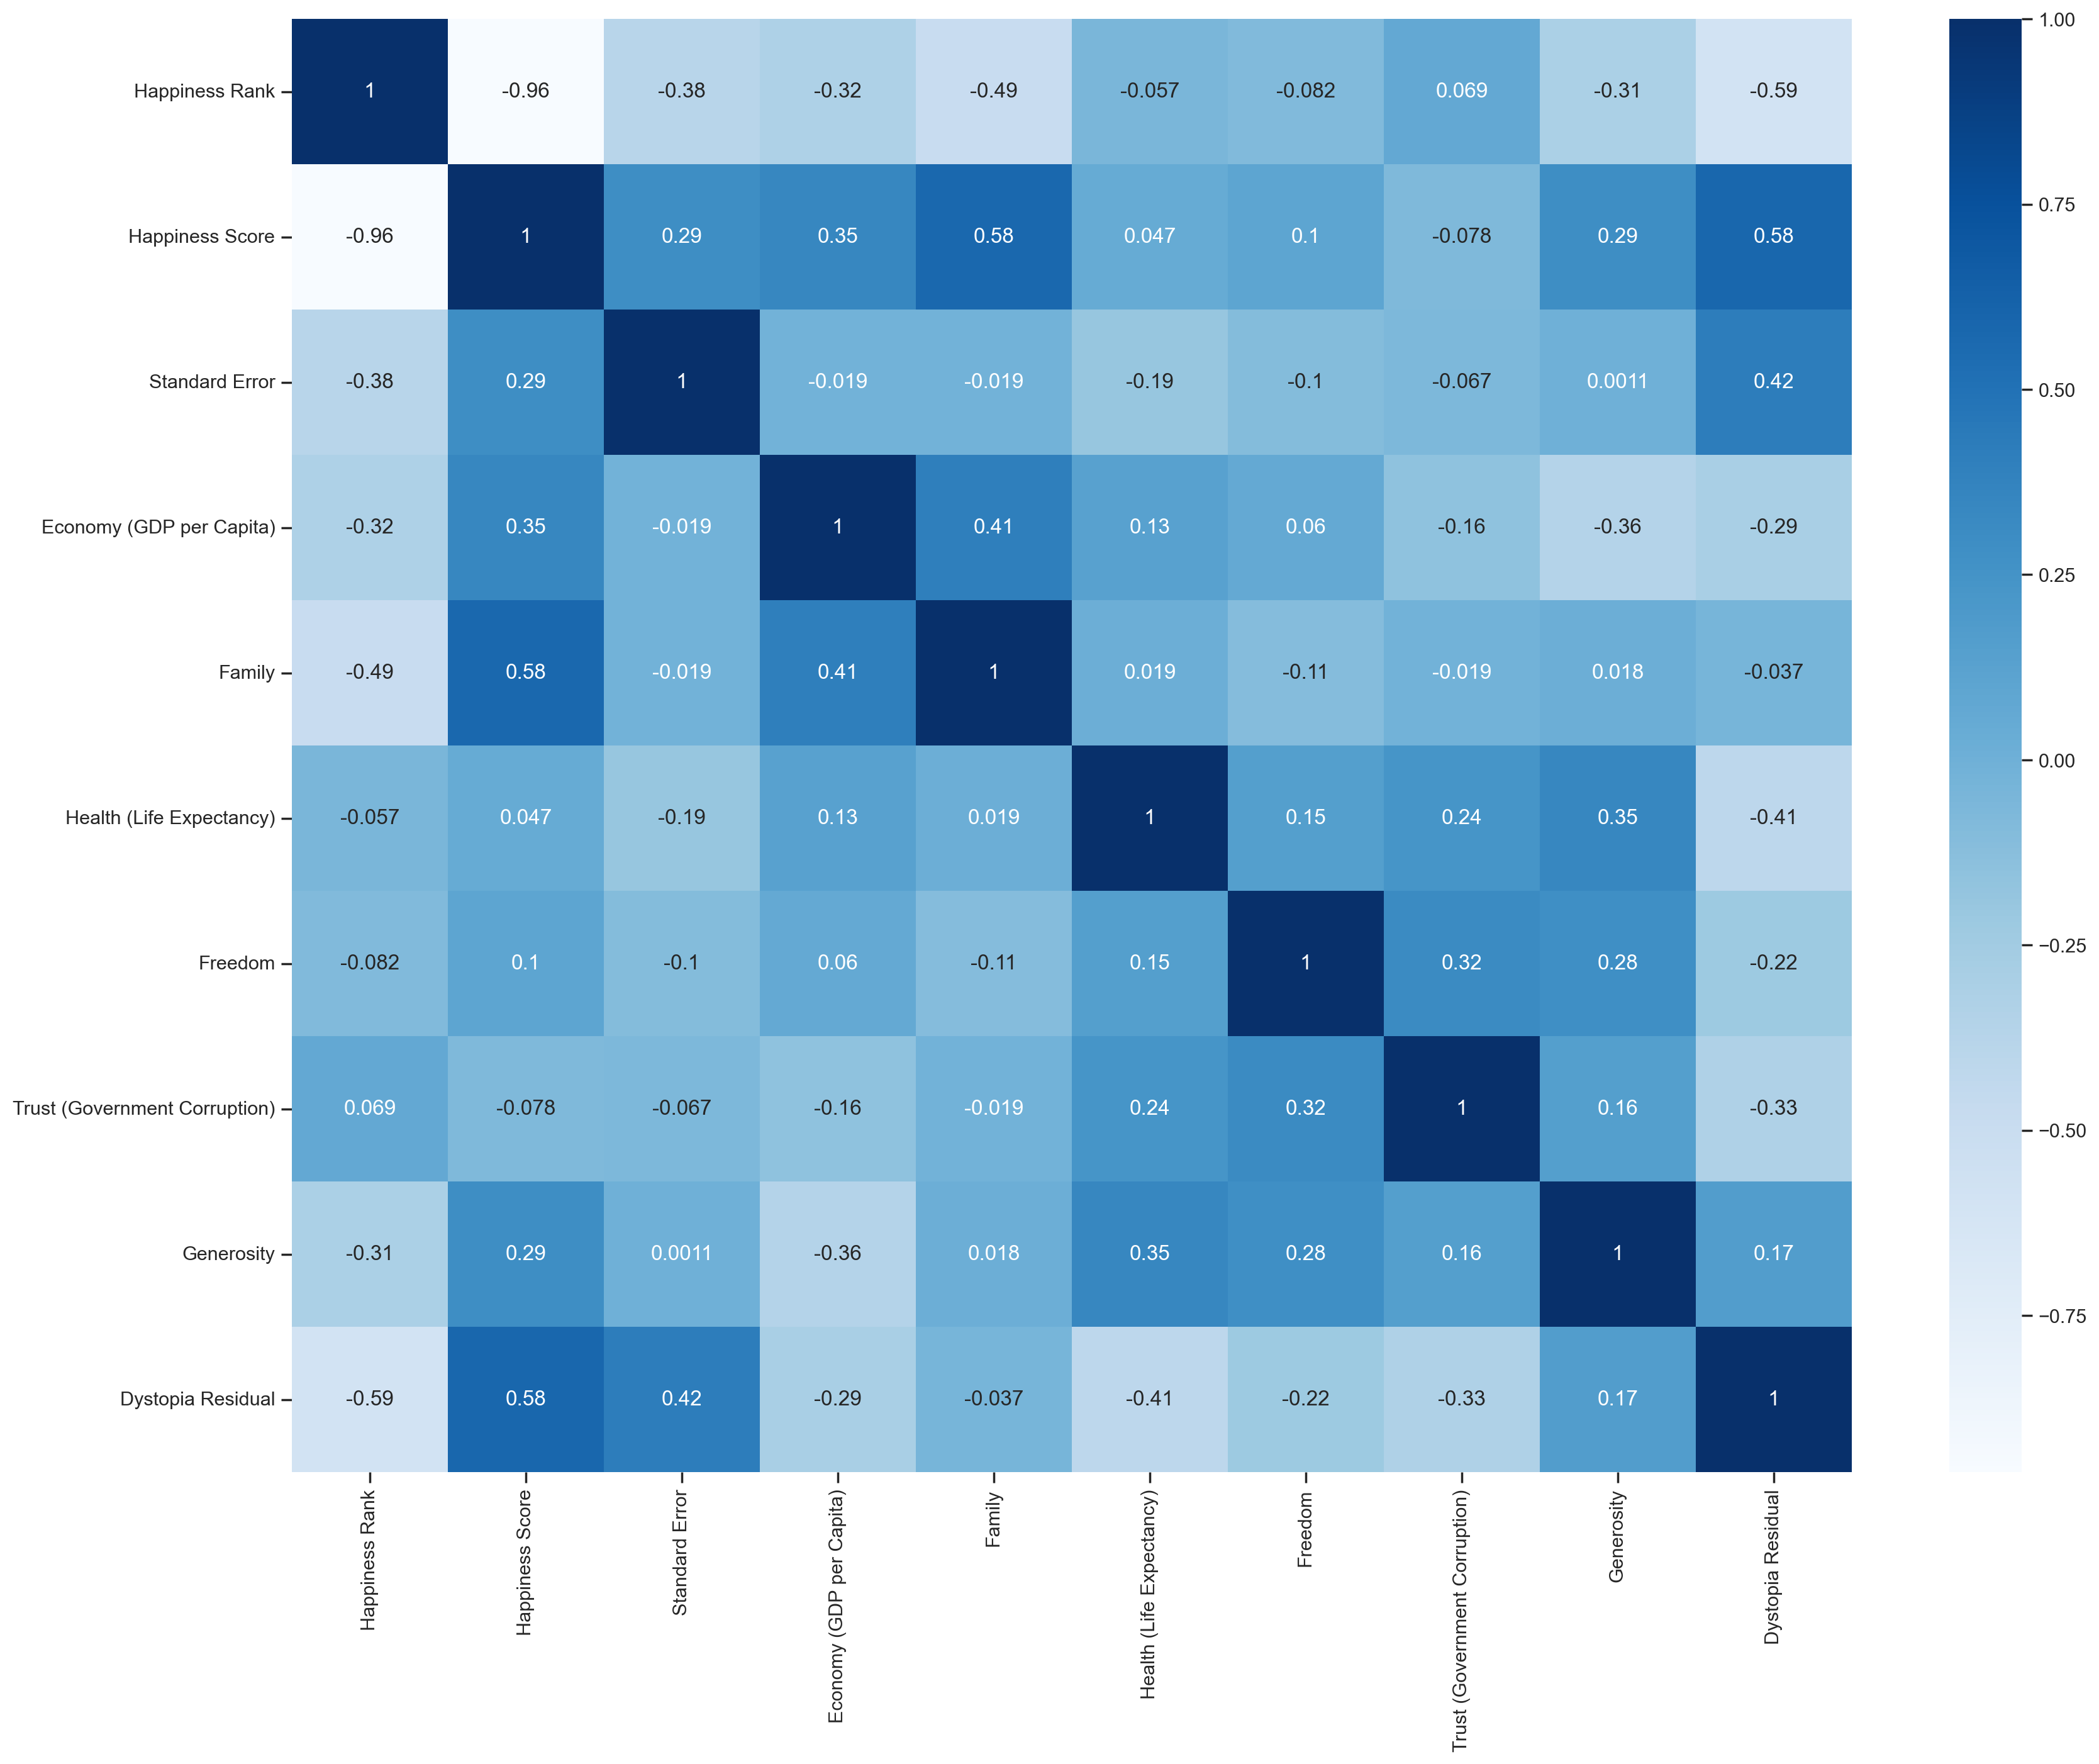

In [36]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

plt.show()